In [5]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt 
import seaborn as sns

D:\New folder\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
D:\New folder\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [2]:
data=pd.read_csv("book.csv")
data.head(5)

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


# APRIORI ALGORITHM

In [3]:
frequent_itemsets = apriori(data, min_support=0.1, use_colnames=True,max_len=3)
frequent_itemsets

D:\New folder\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


<AxesSubplot:xlabel='support', ylabel='itemsets'>

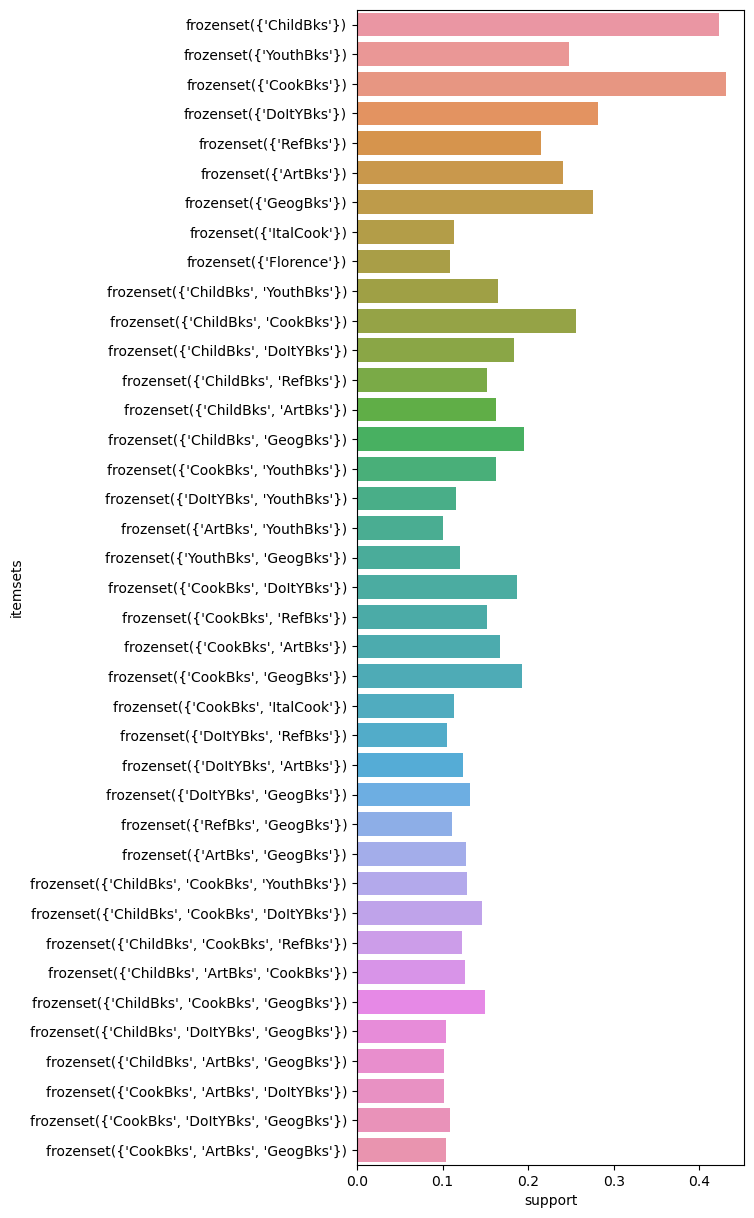

In [10]:
plt.figure(figsize=(5,15))
sns.barplot(data=frequent_itemsets,x="support",y="itemsets")

In [23]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
96,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
97,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


In [24]:
rules[rules["lift"]>2]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
40,"(ChildBks, CookBks)",(YouthBks),0.2560,0.2475,0.1290,0.503906,2.035985,0.065640,1.516850
45,(YouthBks),"(ChildBks, CookBks)",0.2475,0.2560,0.1290,0.521212,2.035985,0.065640,1.553924
46,"(ChildBks, CookBks)",(DoItYBks),0.2560,0.2820,0.1460,0.570312,2.022385,0.073808,1.670982
51,(DoItYBks),"(ChildBks, CookBks)",0.2820,0.2560,0.1460,0.517730,2.022385,0.073808,1.542706
52,"(ChildBks, CookBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277
57,(RefBks),"(ChildBks, CookBks)",0.2145,0.2560,0.1225,0.571096,2.230842,0.067588,1.734652
59,"(ChildBks, CookBks)",(ArtBks),0.2560,0.2410,0.1265,0.494141,2.050376,0.064804,1.500417
62,(ArtBks),"(ChildBks, CookBks)",0.2410,0.2560,0.1265,0.524896,2.050376,0.064804,1.565974


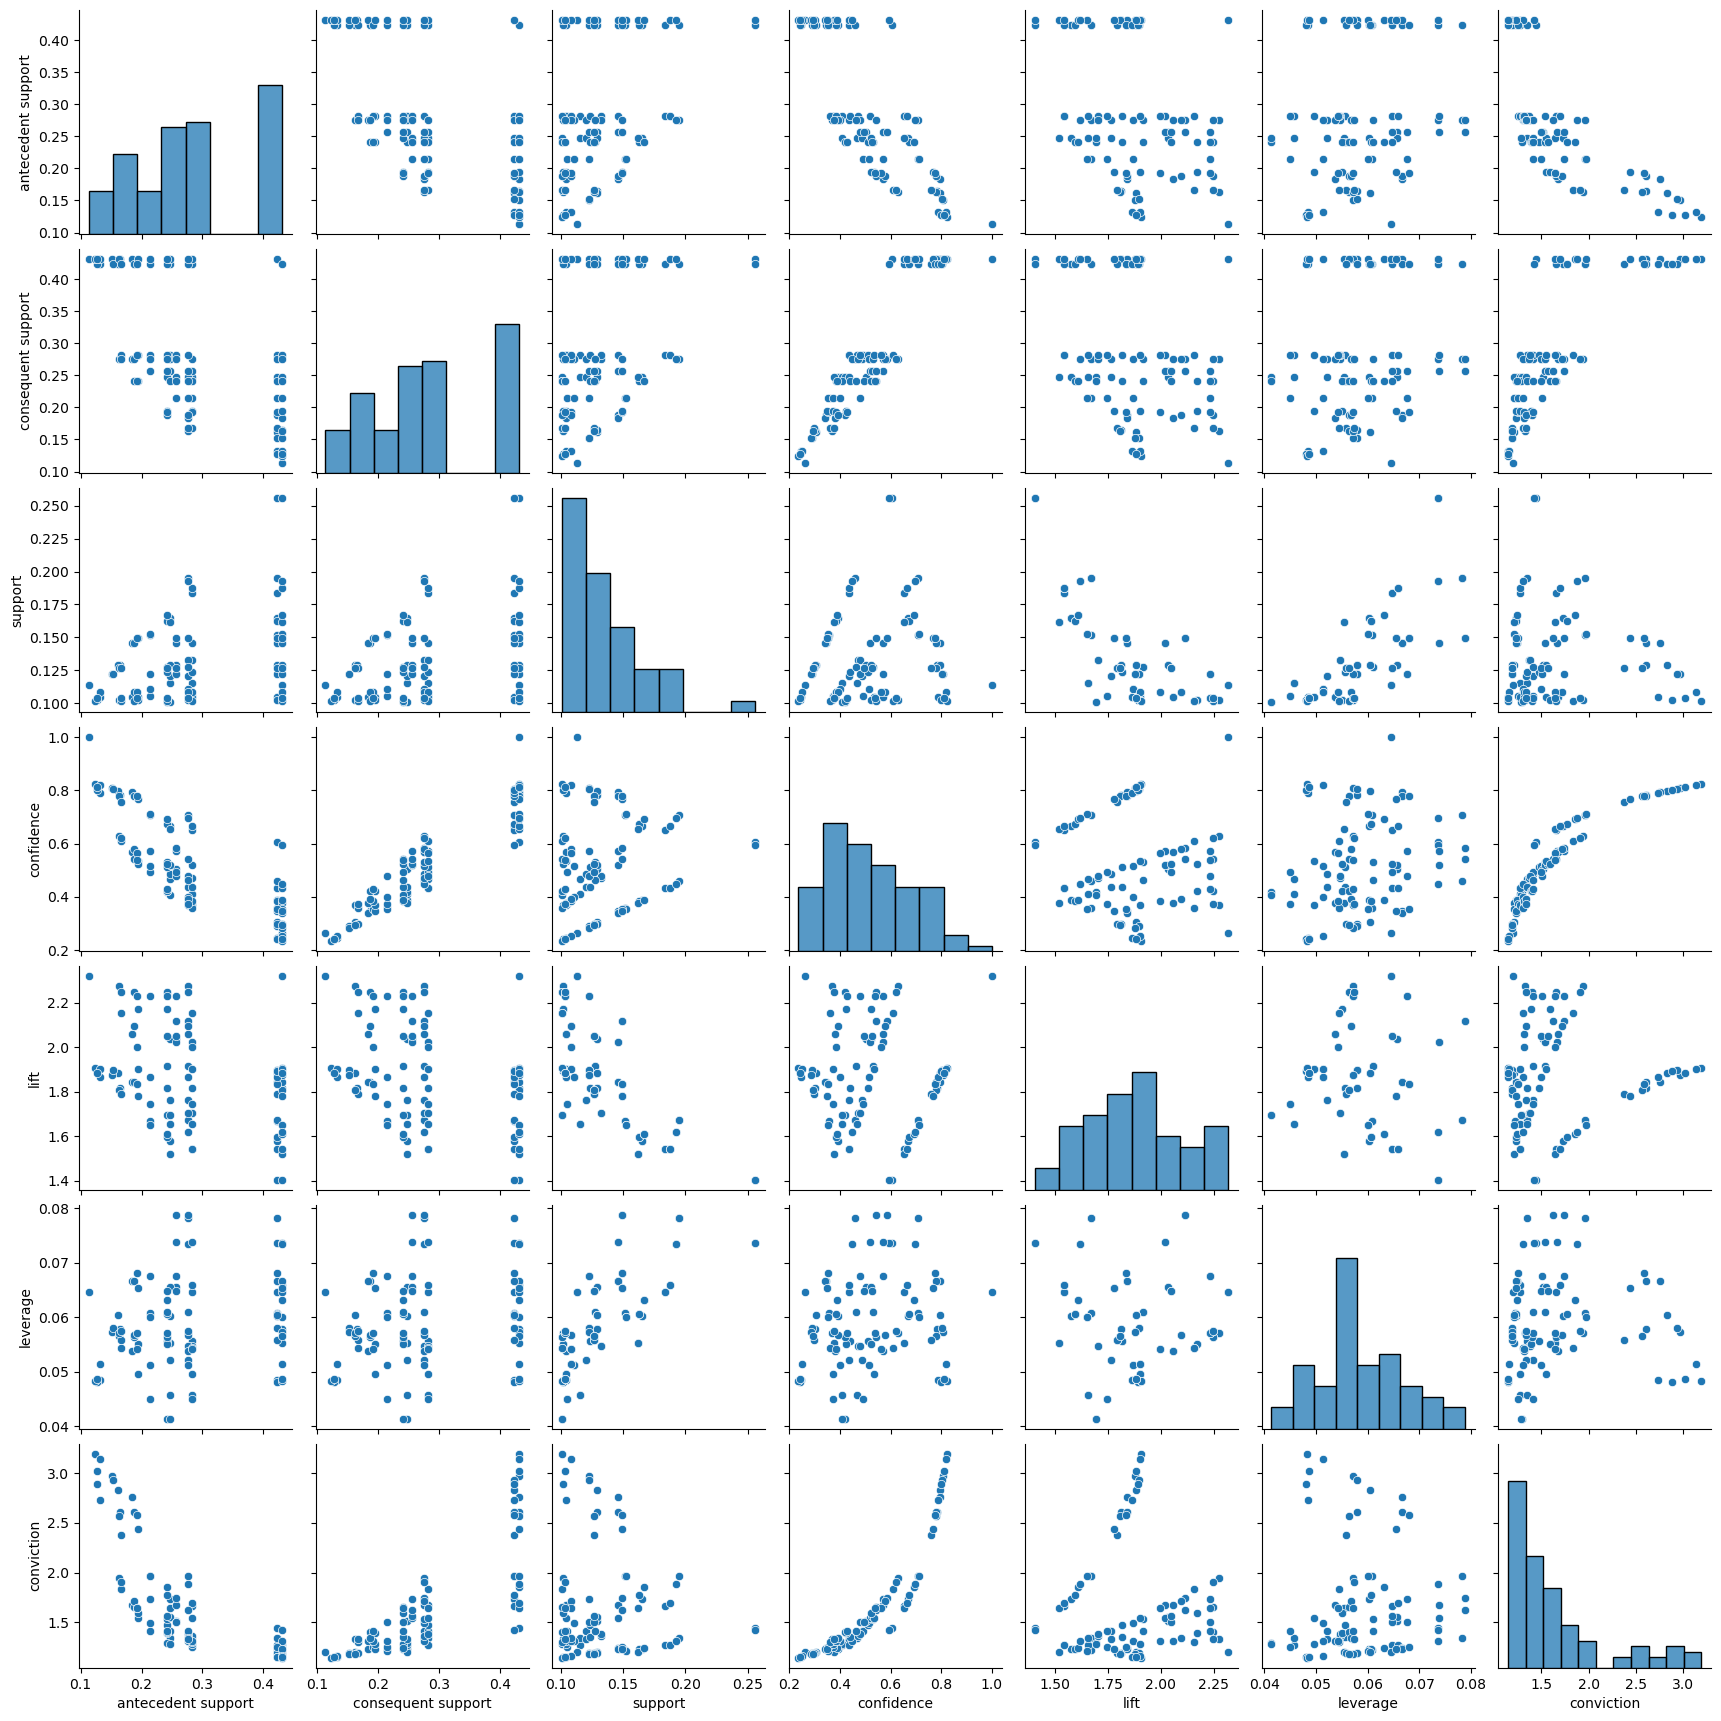

In [25]:
sns.pairplot(rules)

FIXING THE MAXIMUM LENGTH OF FREQUEN ITEMS AS 2 AND CHANGING THE MIN SUPPORT VALUE

In [28]:
frequent_itemsets2 = apriori(data, min_support=0.15, use_colnames=True,max_len=2)
frequent_itemsets2

D:\New folder\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(ChildBks, YouthBks)"
8,0.2560,"(ChildBks, CookBks)"
9,0.1840,"(ChildBks, DoItYBks)"


<AxesSubplot:xlabel='support', ylabel='itemsets'>

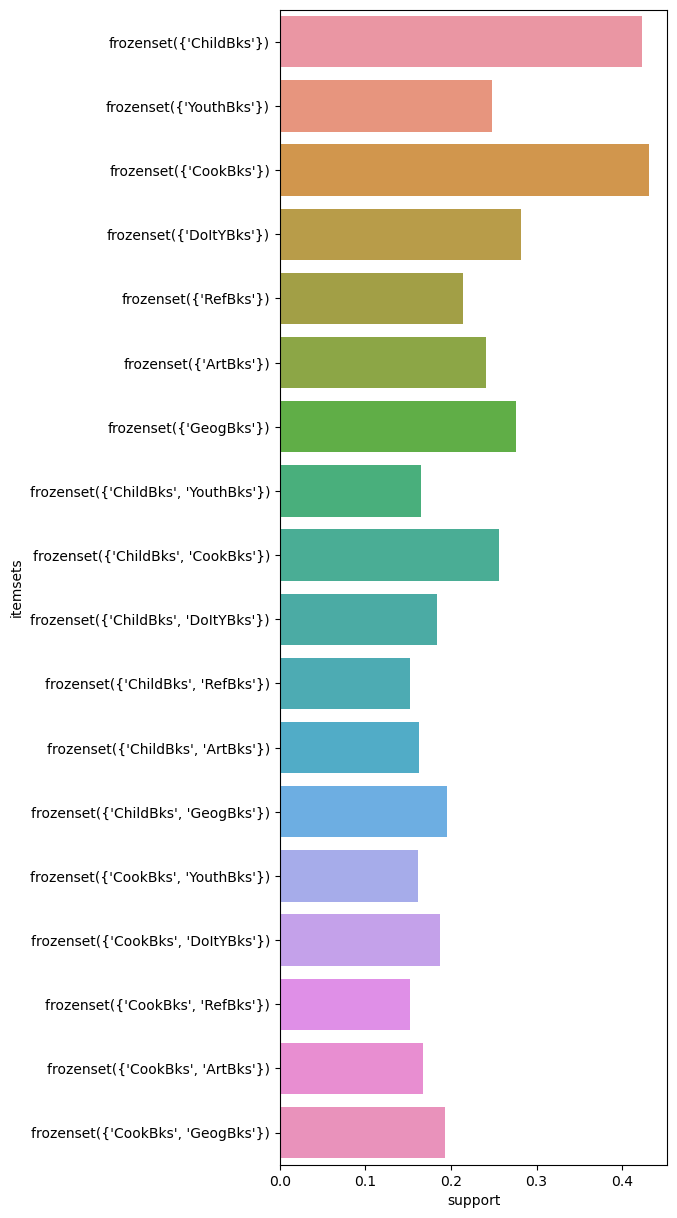

In [30]:
plt.figure(figsize=(5,15))
sns.barplot(data=frequent_itemsets2,x="support",y="itemsets")

In [31]:
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=0.9)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
8,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464
9,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427


In [45]:
viz=pd.DataFrame(rules2[["antecedents","consequents"]].astype(str).apply("-".join, axis=1),columns=["ant&con"])

In [46]:
viz["support"]=rules2["support"]
viz["confidence"]=rules2["confidence"]
viz["lift"]=rules2["lift"]

In [47]:
viz

,ant&con,support,confidence,lift
0,frozenset({'ChildBks'})-frozenset({'YouthBks'}),0.1650,0.390071,1.576044
1,frozenset({'YouthBks'})-frozenset({'ChildBks'}),0.1650,0.666667,1.576044
2,frozenset({'ChildBks'})-frozenset({'CookBks'}),0.2560,0.605201,1.404179
3,frozenset({'CookBks'})-frozenset({'ChildBks'}),0.2560,0.593968,1.404179
4,frozenset({'ChildBks'})-frozenset({'DoItYBks'}),0.1840,0.434988,1.542511
5,frozenset({'DoItYBks'})-frozenset({'ChildBks'}),0.1840,0.652482,1.542511
6,frozenset({'ChildBks'})-frozenset({'RefBks'}),0.1515,0.358156,1.669725
7,frozenset({'RefBks'})-frozenset({'ChildBks'}),0.1515,0.706294,1.669725
8,frozenset({'ChildBks'})-frozenset({'ArtBks'}),0.1625,0.384161,1.594028
9,frozenset({'ArtBks'})-frozenset({'ChildBks'}),0.1625,0.674274,1.594028


<AxesSubplot:xlabel='support', ylabel='ant&con'>

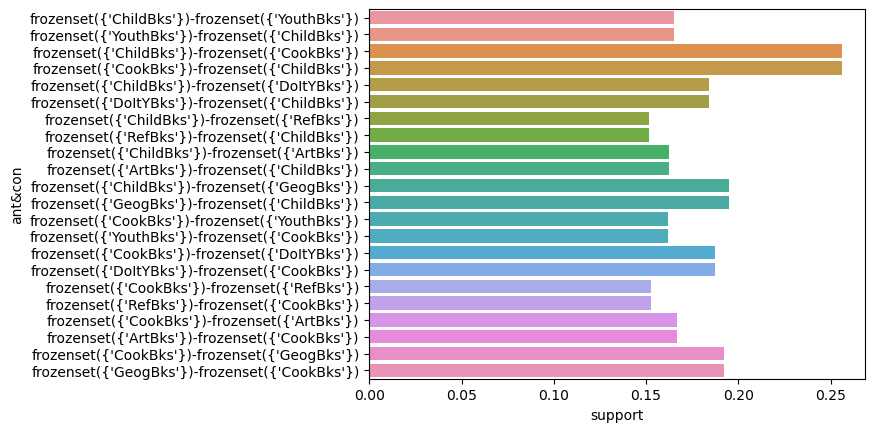

In [50]:
sns.barplot(data=viz,x="support",y="ant&con")

<AxesSubplot:xlabel='lift', ylabel='ant&con'>

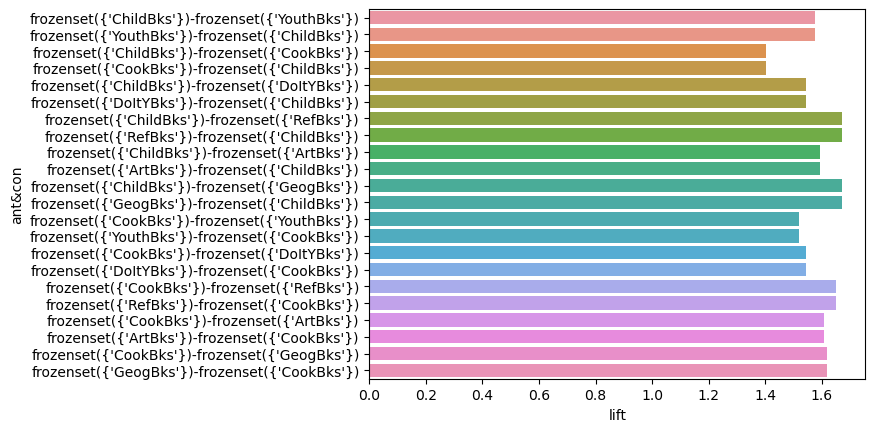

In [52]:
sns.barplot(data=viz,x="lift",y="ant&con")

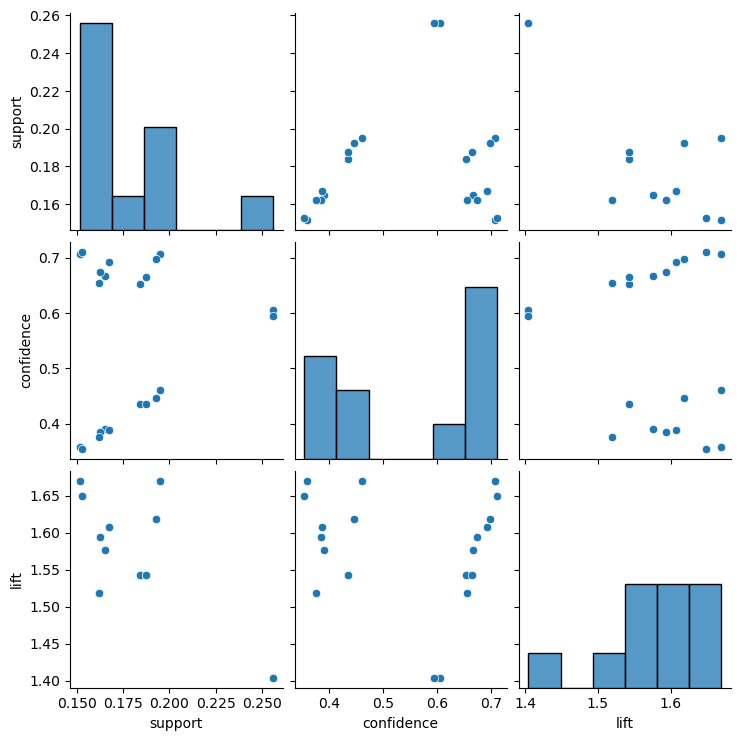

In [53]:
sns.pairplot(viz)